In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from gym_csokoban.envs.csokoban import cSokoban
import gym_sokoban
import gym_csokoban
import gym

import importlib.util
import sys
spec = importlib.util.spec_from_file_location("atari_wrappers", "../torchbeast/torchbeast/atari_wrappers.py")
atari_wrappers = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = atari_wrappers
spec.loader.exec_module(atari_wrappers)

small = True
#env = gym.make("Sokoban-v0")
env = gym.make("cSokoban-v0", small=True)
#env = cSokoban(small=small)
obs = env.reset()
plt.imshow(obs)
plt.show()

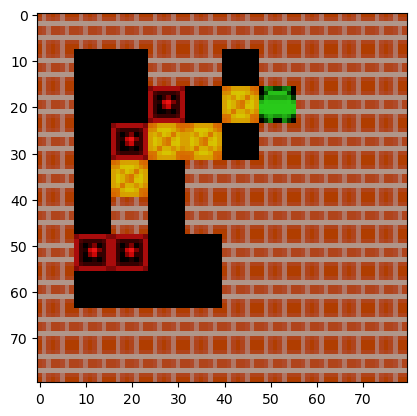

-0.009999999776482582 False {'step_n': 4}


In [40]:
obs, reward, done, info = env.step(1)
plt.imshow(obs)
plt.show()
print(reward, done, info)

In [44]:
state = env.clone_state()

In [47]:
env.restore_state(state)

In [26]:
def f(n):
    env = cSokoban(small=True)
    env.reset()
    for _ in range(n):
        a = np.random.randint(4)    
        obs, reward, done, info = env.step(a)
        if done: 
            env.reset()

def g(n):        
    env = gym.make("Sokoban-v0")
    env = atari_wrappers.WarpFrame(env)
    env.reset()
    for _ in range(n):
        a = np.random.randint(4)   
        obs, reward, done, info = env.step(a)
        if done: env.reset()  
        
def h(n):        
    env = gym.make("cSokoban-v0", small=True)
    env.reset()
    for _ in range(n):
        a = np.random.randint(4)   
        obs, reward, done, info = env.step(a)
        if done: env.reset()          
        
def i(n):        
    env = atari_wrappers.ImageToPyTorch(gym.make("cSokoban-v0", small=True))
    env.reset()
    for _ in range(n):
        a = np.random.randint(4)   
        obs, reward, done, info = env.step(a)
        if done: env.reset()                 
        
        

In [23]:
%time f(10000)        

CPU times: user 350 ms, sys: 0 ns, total: 350 ms
Wall time: 346 ms


In [24]:
%time g(10000)  

CPU times: user 967 ms, sys: 0 ns, total: 967 ms
Wall time: 982 ms


In [30]:
%time h(10000)  

CPU times: user 135 ms, sys: 12.1 ms, total: 148 ms
Wall time: 133 ms


In [29]:
%time i(10000)  

CPU times: user 139 ms, sys: 13.2 ms, total: 153 ms
Wall time: 140 ms
